# SWMAL Exercise

(In the following you need not present your journal in the Qa+b+c+ etc. order. You could just present the final code with test and comments.)

## Training Your Own Linear Regressor

Create a linear regressor, with a Scikit-learn compatible fit-predict interface. You should implement every detail of the linear regressor in Python, using whatever libraries, say `numpy`, you want (except a linear regressor itself).

Below is a primitive _get-started_ skeleton for your implementation. Keep the class name `MyLinReg`, which is used in the test sequence later...

Epoch 1/1000, Loss: 0.4091
Epoch 2/1000, Loss: 0.3833
Epoch 3/1000, Loss: 0.3619
Epoch 4/1000, Loss: 0.3423
Epoch 5/1000, Loss: 0.3238
Epoch 6/1000, Loss: 0.3059
Epoch 7/1000, Loss: 0.2908
Epoch 8/1000, Loss: 0.2750
Epoch 9/1000, Loss: 0.2600
Epoch 10/1000, Loss: 0.2469
Epoch 11/1000, Loss: 0.2348
Epoch 12/1000, Loss: 0.2236
Epoch 13/1000, Loss: 0.2131
Epoch 14/1000, Loss: 0.2033
Epoch 15/1000, Loss: 0.1935
Epoch 16/1000, Loss: 0.1851
Epoch 17/1000, Loss: 0.1773
Epoch 18/1000, Loss: 0.1705
Epoch 19/1000, Loss: 0.1636
Epoch 20/1000, Loss: 0.1576
Epoch 21/1000, Loss: 0.1521
Epoch 22/1000, Loss: 0.1470
Epoch 23/1000, Loss: 0.1423
Epoch 24/1000, Loss: 0.1390
Epoch 25/1000, Loss: 0.1342
Epoch 26/1000, Loss: 0.1310
Epoch 27/1000, Loss: 0.1285
Epoch 28/1000, Loss: 0.1251
Epoch 29/1000, Loss: 0.1223
Epoch 30/1000, Loss: 0.1204
Epoch 31/1000, Loss: 0.1175
Epoch 32/1000, Loss: 0.1160
Epoch 33/1000, Loss: 0.1139
Epoch 34/1000, Loss: 0.1123
Epoch 35/1000, Loss: 0.1109
Epoch 36/1000, Loss: 0.1099
E

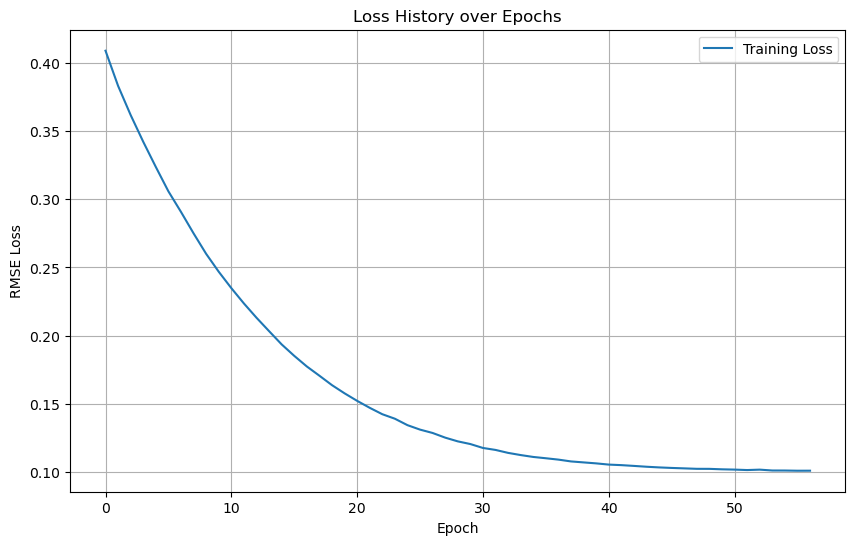

In [ ]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

class MyLinReg():
    def __init__(self, eta0=0.05, max_iter=1000, tol=1e-3, n_iter_no_change=50, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tolerance = tol
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.coef = None # vores w
        self.intercept = None
        self.batch_size = 32
    
    def Weights(self):
        return self.coef[1:]

    def __str__(self):
        return "MyLinReg.__str__(): hi!"

    def fit(self, X, y, method):
        n_samples, n_features = X.shape
        X = add_dummy_feature(X) # Augmenter med 1 taller
        assert X.shape[0] == y.shape[0], "X og y skal være lige store"
        self.coef = np.zeros(X.shape[1])
        best_loss = np.inf # brug numpy infity her
        no_change_counter = 0
        loss = None

        for ep in range(self.max_iter):
            if method == "GD":
                # GD
                y_pred = X @ self.coef
                error = y_pred - y
                gradient = 2*(X.T @ error) / len(y) # hvor y_pred er Xw
                self.coef -= gradient * self.eta0
                # GD
            elif method == "SGD":
                # SGD
                for i in range(0, n_samples, self.batch_size):
                    indices = np.random.randint(0, n_samples, self.batch_size)
                    X_batch = X[indices]
                    y_batch = y[indices]
                    y_pred = X_batch @ self.coef
                    error = y_pred - y_batch
                    gradient = 2 * (X_batch.T @ error) / self.batch_size
                    self.coef -= gradient * self.eta0
                #SGD

            loss = np.sqrt(np.mean(((X @ self.coef) - y) ** 2)) # vores cost RMSE, som svarer til gennemsnit af (y_pred - y)^2 

            print("it: ", ep+1, "\nLoss: ", loss)

            # tjek om den improver
            if abs(best_loss - loss) < self.tolerance:
                no_change_counter += 1

                if no_change_counter >= self.n_iter_no_change:
                    break
            else:
                no_change_counter = 0
                best_loss = loss
        
        self.intercept = self.coef[0]
        self.coef = self.coef[1:]

    def predict(self, X):
        X = add_dummy_feature(X)
        return X @ np.r_[self.intercept, self.coef]
        # assert False, "TODO: implement me"

    def score(self, X, y_true):
        y_pred = self.predict(X)
        sum_squares_total = np.sum((y_true - np.mean(y_true))**2)
        sum_squares_residual = np.sum((y_true - y_pred)**2)
        return 1 - (sum_squares_residual / sum_squares_total) # Scoren

regressor = MyLinReg(eta0=0.01, max_iter=1000, tol=1e-6, n_iter_no_change=10, verbose=False)

## The TODO list

You must investigate and describe all major details for a linear regressor, and implement at least the following concepts (MUST):

### Qa: Concepts and Implementations MUSTS

* Implement: the `fit-predict` interface, for a one-dimensional output only, 
* Implement: a $R^2$ score function (re-use existing code or perhaps just inherit it), 
* Implement: loss function based on (R)MSE,
* Implement: setting of the number of iterations and learning rate ($\eta$) via parameters in the constructor (the signature of your `__init__` must include the named parameters `eta0` and `max_iter`),
* (in a later exercise we will also add `tol`, `n_iter_no_change` and `verbose` to the constructor),
* Implement: the batch-gradient decent algorithm (GD),
* Implement: constant learning rate (maybe also adaptive learning rate if you are brave),
* Implement: stochastic gradient descent (SGD),
* Describe in text: epochs vs iterations,
* Describe in text: compare the numerical optimization with the Closed-form solution.

I det her kodeudsnit har vi implementeret et fit-predict interface for en linær regressor. Vi har også implementeret en R^2 score funktion, en loss funktion baseret på RMSE og vi har implementeret en konstant learning rate med eta parametrene. Vi har også implementeret batch-gradient decent algoritmen og stochastic gradient descent.



### Qb: [OPTIONAL] Additional Concepts and Implementations

And perhaps you could include (SHOULD/COULD):

* (stochastic) mini-bach gradient decent, 
* interface to your bias and weights via `intercept_` and `coef_` attributes on your linear regressor `class`,
* get/set functionality of your regressor, such that it is fully compatible with other Scikit-learn algorithms, try it out in say a `cross_val_score()` call from Scikit-learn,
* test in via the smoke tests at the end of this Notebook,
* testing it on MNIST data.

With the following no-no's (WONT):

* no learning graphs, no early stopping (we will do this in a later exercise),
* no multi-linear regression,
* no reuse of the Scikit-learn regressor,
* no `C/C++` optimized implementation with a _thin_ Python interface (nifty, but out-of-scope for this cause),
* no copy-paste of code from other sources WITHOUT a clear cite/reference for your source.

### Qc: Testing and Test Data

Use mainly very low-dimensional data for testing, say the IRIS set, since it might be very slow. Or create a simple low-dimensionality data generator.

(There is a _micro_ data set in the function `GenerateData` in the smoke tests functions below, but better is to opt for an realistic data set.)




In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

linRegModel = MyLinReg(0.0001)
iris = load_iris()
X = iris.data[:, 0].reshape(-1, 1) # transponerer X?
print(X)
y = iris.data[:, 1]

linRegModel.fit(X, y, "GD")

predictions = linRegModel.predict(X)
# print(predictions)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

Alt under Qc her:
### Qd: The Journaling of Your Regressor 

For the journal, write a full explanation of how you implemented the linear regressor, including a code walk-through (or mini-review of the most interesting parts).

Vi har implementeret en linear regressor class “MyLinReg”, og med mulighed for at bruge en Gradient Descent eller Stochastic Gradient Descent solver, som afgør hvordan loss funktionen bliver minimeret. I vores fit-predict interface starter vi med at sætte variablerne fra constructeren på klassen selv, inden vi kalder vores solver metode (som enten er GD eller SGD).

Solver metoden tager nogle iterationer, og mellem hver iteration opdaterer vi vores vægte (vores w, self.coef) ved at bruge vores loss funktion og gradienten af vores loss funktion. Vi bruger vores loss funktion til at evaluere vores model, og tjekker loss hver gang for at se om den bliver bedre hver iteration (hvor første gang er loss super høj for at barren for improvement er meget lav). Hvis loss ikke bliver bedre, så stopper vi vores iterationer efter efter den har kørt "max_iter" iterationer.

Det her er alt sammen til for at prøve at minimere loss. Vi har også implementeret en R^2 score funktion, som vi bruger til at evaluere vores model. Vi har også gjort så man kan sætte en constant learning rate i form af parameteren eta0, der (sammen med gradient) styrer hvor drastisk vi skal ændre vores vægte.


### Qe: Mathematical Foundation for Training a Linear Regressor

You must also include the theoretical mathematical foundation for the linear regressor using the following equations and graphs (free to include in your journal without cite/reference), and relate them directly to your code:

* Design matrix of size $(n, d)$ where each row is an input column vector $(\mathbf{x}^{(i)})^\top$ data sample of size $d$

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands v01, remember: no newlines in defs}
    \rem{MACRO eq: equation <#1:lhs> <#2:rhs>}
    \def\eq#1#2{#1 &=& #2\\}
    \rem{MACRO arr: array <#1:columns (lcr..)> <#2:content>}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \rem{MACRO ac: array column vector <#1:columns (lcr..)> <#2:content>}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \rem{MACRO st: subscript text <#1:content>}
    \def\st#1{_{\textrm{#1}}}
    \rem{MACRO norm: norm caligari L <#1:content>}
    \def\norm#1{{\cal L}_{#1}}
    \rem{MACRO obs: ??}
    \def\obs#1#2{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \rem{MACRO diff: math differetial operator <#1:content>}
    \def\diff#1{\mathrm{d}#1} 
    \rem{MACRO half: shorthand for 1/2}
    \def\half{\frac{1}{2}}
    \rem{MACRO pfrac: partial fraction <#1:numenator> <#2:denumenator>}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \rem{MACRO dfrac: differetial operator fraction <#1:numenator> <#2:denumenator>}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \rem{MACRO pown: power and parantesis (train/test..) <#1:content>}
    \def\pown#1{^{(#1)}}
    \rem{MACROS powi, pown: shorthands for power (i) and (n)}
    \def\powni{\pown{i}}
    \def\pownn{\pown{n}}
    \rem{MACROS powtest, powertrain: power (test) and (train)}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \rem{MACRO boldmatrix: bold matix/vector notation} 
    \def\boldmatrix#1{\mathbf{#1}} 
    \rem{MACROS X,Z,x,y,w: bold X,Z,x etc.} 
    \def\bX{\boldmatrix{X}}
    \def\bZ{\boldmatrix{Z}}
    \def\bx{\boldmatrix{x}}
    \def\by{\boldmatrix{y}}
    \def\bw{\boldmatrix{w}}
    \def\bz{\boldmatrix{z}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \rem{MACROS stpred, sttrue: shorthand for subscript 'pred' and 'true'}
    \def\stpred{\st{pred}~}
    \def\sttrue{\st{true}~}
    \rem{MACROS ypred, ytrue:   shorthand for scalar y 'pred' and 'true'}
    \def\ytrue{y\sttrue}
    \def\ypred{y\stpred} 
    \rem{MACROS bypred, bytrue: shorthand for vecor y 'pred' and 'true'} 
    \def\bypred{\boldmatrix{y}\stpred}
    \def\bytrue{\boldmatrix{y}\sttrue} 
\bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2} \\
            \vdots      &             &        & \vdots      \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn   \\
        } 
$$

* Target ground-truth column vector of size $n$

$$
\bytrue =
  \ac{c}{
     y\pown{1}\sttrue \\
     y\pown{2}\sttrue \\
     \vdots           \\
     y\pown{n}\sttrue \\
  } 
$$

* Bias factor, and by convention in the following (prepend one)

$$
\ar{rl}{
  \ac{c}{1\\\bx\powni} & \mapsto \bx\powni\\
}
$$

* Weight column vector of size $d+1$ (i.e. with bias or intercept element $w_0$ prepended)

$$
\bw =
    \ac{c}{
         w_0    \\
         w_1    \\
         w_2    \\
         \vdots \\
         w_d    \\
    }
$$

* Linear regression model hypothesis function for a column vector input $\bx\powni$ of size $d$ and a column weight vector $\bw$ of size $d+1$
$$
\ar{rl}{
  ~~~~~~~~~~~~~~~
  h(\bx\powni;\bw) &= \ypred\powni \\
                   &= \bw^\top \bx\powni ~~~~ (\bx\powni~\textrm{with bias element})\\ 
                   &= w_0  \cdot 1+ w_1 x_1\powni + w_2 x_2\powni + \cdots + w_d x_d\powni & \\
}
$$

* Individual losses based on the $\norm{2}^2$ (last part assuming one dimensional output)

$$
\ar{rl}{
  L\powni &= || \ypred \powni         - \ytrue\powni~ ||_2^2\\
          &= || h(\bx\powni;\bw)      - \ytrue\powni~ ||_2^2\\
          &= || \bw^\top\bx\powni     - \ytrue\powni~ ||_2^2\\
          &= \left( \bw^\top\bx\powni - \ytrue\powni~ \right)^2 ~~~~~ \textrm{(only for 1D output)}
}
$$

* MSE loss function

$$
\ar{rl}{
    \textrm{MSE}(\bX,\bytrue;\bw)  &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                                   &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni\sttrue \right)^2\\
                                   &= \frac{1}{n} ||\bX \bw - \bytrue||_2^2
}
$$                   


* Loss function, proportional to (R)MSE

$$
\ar{rl}{
   J &= \frac{1}{2} ||\bX \bw - \bytrue||_2^2\\
     &  \propto \textrm{MSE}
}
$$

* Training: computing the optimal value of the $\bw$ weight; that is finding the $\bw$-value that minimizes the total loss

$$
  \bw^* = \textrm{argmin}_\bw~J\\
$$

* Visualization of $\textrm{argmin}_\bw$ means to the argument of $\bw$ that minimizes the $J$ function. The minimization can in 2-D visually be drawn as finding the lowest $J$ that for linear regression always forms a convex shape 

<img src="https://itundervisning.ase.au.dk/SWMAL/L05/Figs/minimization.png" alt="WARNING: could not get image from the server." style="height:240px">

#### Training I: The Closed-form Solution

* Finding the optimal weight in a _one-step_ analytic expression 

$$
  \bw^* ~=~ \left( \bX^\top \bX \right)^{-1}~ \bX^\top \bytrue
$$


#### Training II: Numerical Optimization 

* The Gradient of the loss function

$$   
  \nabla_\bw~J = \left[ \frac{\partial J}{\partial w_1} ~~~~ \frac{\partial J}{\partial w_2} ~~~~ \ldots  ~~~~ \frac{\partial J}{\partial w_d} \right]^\top
$$

* The Gradient for the based $J$

$$
\ar{rl}{
  \nabla_\bw J &= \frac{2}{n} \bX^\top \left( \bX \bw - \bytrue \right)
}
$$

* The Gradient Decent Algorithm (GD)

$$ 
  \bw^{(step~N+1)}~ = \bw^{(step~N)} ~ - \eta \nabla_{\bw} J
$$

* Visualization of GD, showing $J$ as a function of two $w$-dimensions

<img src="https://itundervisning.ase.au.dk/SWMAL/L05/Figs/minimization_gd.png" alt="WARNING: could not get image from the server." style="height:240px">

### Qf: Smoke testing

Once ready, you can test your regressor via the test stub below, or create your own _test suite_.

Be aware that setting the stepsize, $\eta$, value can be tricky, and you might want to tune `eta0` below.

Test 1 PASSED: Model instantiated with default parameters.
Test 2 PASSED: Model instantiated with custom parameters.
Test 3 PASSED: Model fitted using batch gradient descent.
Test 4 PASSED: Model made predictions.
Test 5 PASSED: Model computed score (RMSE = 0.1286).
Test 6 PASSED: Weights and bias are updated.
Test 7 PASSED: Model fitted using stochastic gradient descent.
Test 8 PASSED: Model fitted using mini-batch gradient descent.
Test 9 PASSED: Loss history is recorded.


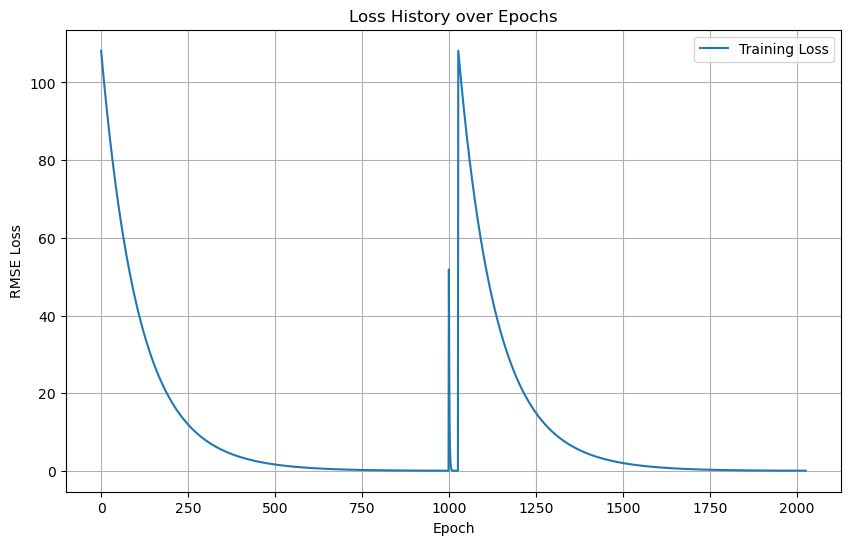

Test 10 PASSED: Loss history plot displayed.


In [ ]:
# Mini smoke test for your linear regressor: TestMyLinReg

import sys
import numpy

### SOME NIFTY HELPER FUNS ###

def isVector(y, expected_n=-1):
    assert isinstance(y, numpy.ndarray), f"expected type 'numpy.array' but got {type(y)}"
    assert y.ndim==1, f"expected y.ndim==1 but got {y.ndim}"
    assert expected_n<0 or expected_n==y.shape[0], f"expected vector of size {expected_n} but got size {y.shape}"
    return True

def isMatrix(X, expected_m=-1, expected_n=-1):
    assert isinstance(X, numpy.ndarray), f"expected type 'numpy.array' but got {type(X)}"
    assert X.ndim==2, f"expected X.ndim==2 but got {X.ndim}"
    assert expected_m<0 or expected_m==y.shape[0], f"expected matrix of size {expected_m}x{expected_n} but got size {X.shape}"
    assert expected_n<0 or expected_n==y.shape[1], f"expected vector of size {expected_m}x{expected_n} but got size {X.shape}"
    return True

def PrintMatrix(x, label="", precision=12, linewidth=60):
    hasFancy = False
    # try:
    #     # NOTE: how does multiple import behave, any performance issues?
    #     from libitmal.utils import PrintMatrix as FancyPrintMatrix
    #     hasFancy = True
    # except Exception as ex:
    #     Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    if hasFancy:
        FancyPrintMatrix(x, label=label, precision=precision, linewidth=linewidth)
    else:
        # default simple implementation
        print(f"{label}{' ' if len(label)>0 else ''}{x}")

def Col(color):
    hasFancy = False
    # try:
    #     from libitmal.Utils.colors import Col as FancyCol
    #     hasFancy = True
    # except Exception as ex:
    #     Warn("could not import Col from libitmal.Utils.colors, defaulting to simple function..")

    if hasFancy:
        return FancyCol(color)
    else:
        return ""

def ColEnd():
    hasFancy = False
    # try:
    #     from libitmal.Utils.colors import ColEnd as FancyColEnd
    #     hasFancy = True
    # except Exception as ex:
    #     Warn("could not import Col from libitmal.Utils.colors, defaulting to simple function..")

    if hasFancy:
        return FancyColEnd()
    else:
        return ""

def PrintOutput(msg, pre_msg, ex=None, color="", filestream=sys.stdout):

    def FormatTxt(txt, linewidth=60, prefix="", replacetabs=True):
        assert isinstance(txt, str)
        assert isinstance(linewidth, int) and linewidth > 0
        assert isinstance(prefix, str)

        if replacetabs:
            txt = txt.replace("\t","    ")

        r = ""
        n = 0
        m = 0
        for i in txt:
            m += 1
            if n >= linewidth:
                if not i.isspace() and m < len(txt) and not txt[m].isspace():
                    r += "\\" # add hypen
                r += "\n" + prefix
                n = 0

            if n == 0 and i.isspace():
                continue # skip leading space

            r += i
            n += 1

            if i == "\n":
                r += prefix
                n = 0

        return r

    col_beg = Col(color)
    col_end = ColEnd()

    prefix = "".ljust(len(pre_msg)) 
    msg = FormatTxt(msg, prefix=prefix)
    
    print(f"{col_beg}{pre_msg}{msg}{col_end}\n", file=filestream)

    if ex is not None:
        #msg += f"\n   EXCEPTION: {ex} ({type(ex)})"
        PrintOutput(str(ex), prefix + "EXCEPTION: ", None, "red", filestream)


def Warn(msg, ex=None):
    PrintOutput(msg, "WARN:  ", ex, "lyellow")


def Err(msg, ex=None):
    PrintOutput(msg, "ERROR: ", ex, "lred" )
    raise Exception(msg) if ex is None else ex


def Info(msg):
    PrintOutput(msg, "INFO:  ", None, "lpurple")


def SimpleAssertInRange(x, expected, eps):
    #assert isinstance(x, numpy.ndarray)
    #assert isinstance(expected, numpy.ndarray)
    #assert x.ndim==1 and expected.ndim==1
    #assert x.shape==expected.shape
    assert eps>0
    assert numpy.allclose(x, expected, eps) # should rtol or atol be set to eps?


def GenerateData():
    X = numpy.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = numpy.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y


def TestMyLinReg():
    X, y = GenerateData()

    # try:
    #     # assume that your regressor class is named 'MyLinReg', please update/change
    #     regressor = MyLinReg()
    # except Exception as ex:
    #     Err("your regressor has another name, than 'MyLinReg', please change the name in this smoke test", ex)

    # try:
    #     regressor = MyLinReg(max_iter=200)
    # except Exception as ex:
    #     Err("your regressor can not be constructed via the __init_ for parameter 'max_iter'", ex)
    # try:
    #     regressor = MyLinReg(eta0=0.01)
    # except Exception as ex:
    #     Err("your regressor can not be constructed via the __init_ for parameter 'eta0'", ex)
    # try:
    #     regressor = MyLinReg(verbose=False)
    # except Exception as ex:
    #     Warn("your regressor can not be constructed via the __init_ for parameter 'verbose'", ex)
    # try:
    #     regressor = MyLinReg(tol=1e-3)
    # except Exception as ex:
    #     Warn("your regressor can not be constructed via the __init_ for parameter 'tol'", ex)
    # try:
    #     regressor = MyLinReg(n_iter_no_change=1e-3)
    # except Exception as ex:
    #     Warn("your regressor can not be constructed via the __init_ for parameter 'n_iter_no_change'", ex)

    # # create regressor with default hyperparameter values
    # # to be used for training, prediction and score..
    # try:
    #     regressor = MyLinReg(eta0=0.01, max_iter=1000, tol=1e-6, n_iter_no_change=10, verbose=False)
    # except Exception as ex:
    #     Err("your regressor can not be constructed via the __init_ with default parameters", ex)


    try:
        regressor.fit(X, y, "sgd")
    except Exception as ex:
        Err("your regressor can not fit", ex)

    try:
        y_pred = regressor.predict(X)
        Info(f"y_pred = {y_pred}")
    except Exception as ex:
        Err("your regressor can not predict", ex)


    try:
        score  = regressor.score(X, y)
        Info(f"SCORE = {Col('lblue')}{score}{ColEnd()}")
    except Exception as ex:
        Err("your regressor fails in the score call", ex)


    try:
        w    = None # default
        bias = None # default
        try:
            w = regressor.coef
            bias = regressor.intercept
        except Exception as ex:
            w = None
            Warn("your regressor has no coef_/intercept_ atrributes, trying Weights() instead..", ex)
        try:
            if w is None:
                w = regressor.Weights() # maybe a Weigths function is avalible on you model?
                try:
                    assert w.ndim == 1,     "can only handle vector like w's for now"
                    assert w.shape[0] >= 2, "expected length of to be at least 2, that is one bias one coefficient"
                    bias = w[0]
                    w = w[1:]
                except Exception as ex:
                    w = None
                    Err("having a hard time concantenating our bias and coefficients, giving up!", ex)
        except Exception as ex:
            w = None
            Err("your regressor also has no Weights() function, giving up!", ex)
        Info(f"bias         = {bias}")
        Info(f"coefficients = {w}")
    except Exception as ex:
        Err("your regressor fails during extraction of bias and weights (but is a COULD)", ex)

    # try:
    #     from libitmal.utils import PrintMatrix
    # except Exception as ex:
    #     PrintMatrix = SimplePrintMatrix # fall-back
    #     Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    try:
        from libitmal.utils import AssertInRange
    except Exception as ex:
        AssertInRange = SimpleAssertInRange # fall-back
        # Warn("could not import AssertInRange from libitmal.utils, defaulting to simple function..")

    try:
        if w is not None:
            if bias is not None:
                w = numpy.concatenate(([bias], w)) # re-concat bias an coefficients, may be incorrect for your implementation!
            
            # TEST VECTOR:
            w_expected = numpy.array([4.046879011698, 1.880121487278])
            
            PrintMatrix(w,          label="       w         =")
            PrintMatrix(w_expected, label="       w_expected=")
            print()
            
            eps = 1E-2 # somewhat big epsilon, allowing some slack..
            # AssertInRange(w, w_expected, eps) #### SPØRG Carsten hvad der gør at vores ikke er god nok
            # Info("Well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!")
            
            return regressor
        else:
            Warn("cannot test due to missing w information")
    except Exception as ex:
        Err("mini-smoketest on your regressor failed", ex) # spørg Carsten hvad vi gør galt
    
    return None

Warn("This mini smoke-test may produce false-positives and/or\n false-negatives..") 
TestMyLinReg()

print("OK")

### Qg: [OPTIONAL] More Smoke-Testing

Do you dare to compare your custom regressor with the SGD regressor in Scikit-learn on both the IRIS and MNIST datasets?

Then run the next smoke-test function, but the code might requre `eta0` anb `max_iter` hyperparamter tuning)..

In [8]:
from sklearn.linear_model    import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import Pipeline

try:
    from libitmal import dataloaders
except Exception as ex:
    Err("can not import dataloaders form libitmal, and then I can not run the TestAndCompareRegressors smoke-test, sorry!", ex)

def TestAndCompareRegressors():
    for f in [("IRIS",  dataloaders.IRIS_GetDataSet,  1E-2),
              ("MNIST", dataloaders.MNIST_GetDataSet, 1E-3)]:
        
        # NOTE: f-tuble is (<name>, <data-loader-function-pointer>, <eps0>)
        data = f[1]() # returns (X, y)
        X_train, X_test, y_train, y_test = train_test_split(data[0], data[1])
        
        Info(f"DATA: '{f[0]}'\n\tSHAPES: X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")

        eta0 = f[2] # an adaptive learning rate is really needed here!
        regressor0 = MyLinReg(eta0=eta0, max_iter=1000)
        regressor1 = SGDRegressor()    

        for r in [("MyLinReg", regressor0), ("SGDRegressor", regressor1)]:
            Info(f"\nTRAINING['{r[0]}']..")
            
            pipe = Pipeline([('scaler', StandardScaler()), r])
            pipe.fit(X_train, y_train)
            
            y_pred_test = pipe.predict(X_test)
            
            PrintMatrix(y_pred_test, label="y_pred_test=", precision=4)
            print()
            
            r2 = pipe.score(X_test, y_test)
            Info(f"SCORE['{r[0]}'] = {Col('lblue')}{r2:0.3f}{ColEnd()}")
            
        Info("\n##############################################\n")

# somewhat more verbose testing, you regressor will likely fail on MNIST 
# or at least be very, very slow...
TestAndCompareRegressors()

print("OK")

ERROR: can not import dataloaders form libitmal, and then I can not
       run the TestAndCompareRegressors smoke-test, sorry!

       EXCEPTION: No module named 'libitmal'



ModuleNotFoundError: No module named 'libitmal'

### Qh Conclusion

As always, take some time to fine-tune your regressor, perhaps just some code-refactoring, cleaning out 'bad' code, and summarize all your findings
 above. 

In other words, write a conclusion.

REVISIONS||
:- | :- |
2022-12-22| CEF, initial draft. 
2023-02-26| CEF, first release.
2023-02-28| CEF, fix a few issues related to import from libitmal, added Info and color output.
2024-09-19| CEF, major overhaul, change math/text and code snippets.
2024-09-25| CEF, final fixes, tests, and proof-reading. Moved early stopping and learning graphs to a later excercise.
2024-10-04| CEF, clarified Qa with respect to what-is-to-be implemented and what-is-to-be described in text only.